In [ ]:
pip install gower

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# pip install kneed
from kneed import KneeLocator
%matplotlib inline

def setFigSize(arr=[15,10]):
  plt.rcParams['figure.figsize'] = arr

def resetFigSize():
  plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]


setFigSize()

In [3]:
# Constants
LABELLED_COLUMN_NAME = "Labelled"
BLANK_ROW_NAME = "blank"
NEAT_COLUMN_NAME = "Neat"
CLUSTER_COLUMN_NAME = "cluster"

def color_setter(number: float) -> int:
    if number > 0.75:
        return 3
    elif number > 0.5:
        return 2
    else:
        return 1

### Read cross inhibition raw data

In [4]:
ci_raw_data = pd.read_csv("../Data/n-antigen-cross_inhibitor.csv", sep=',')
ci_raw_data.dropna(inplace=True)
ci_raw_data.reset_index(level=0, drop=True, inplace=True)
ci_raw_data_filtered = ci_raw_data.drop(NEAT_COLUMN_NAME, axis=1)
ci_raw_data_filtered

,Labelled,NP1501*,NP1502*,NP1503*,NP1508*,NP1510*,NP1514*,NP1516*,NP1517*,NP1518*,...,X202*,X211*,X213*,X215*,X217*,X220*,X221*,X223*,X233*,X271*
0,blank,1.089,1.067,1.3664,1.4120,1.670,1.0700,1.1704,1.110,1.1616,...,1.1844,1.4220,1.3617,1.1050,1.3671,1.484,1.3536,1.4688,1.234,1.412
1,NP1501,0.449,0.715,1.0664,1.0248,1.136,0.2600,0.4172,0.268,0.8512,...,0.5316,1.2267,1.2519,0.6400,1.0224,1.189,0.8856,1.4616,0.769,1.228
2,NP1502,0.893,0.425,0.3360,0.1960,0.349,0.3625,0.6650,0.450,1.0000,...,0.6492,1.2087,1.2753,0.5500,1.0593,1.203,0.2979,1.4184,0.809,0.407
3,NP1503,0.768,0.309,0.0680,0.0520,0.095,0.3050,0.7126,0.408,0.9888,...,0.6420,1.1970,1.2582,0.6075,1.0791,1.215,0.1035,1.4704,0.930,0.109
4,NP1507,0.422,0.856,0.7216,0.6088,0.785,0.1825,0.4256,0.154,1.0352,...,0.6432,1.2213,1.2672,0.5125,1.0215,1.244,0.6624,1.4168,1.018,0.843
5,NP1508,0.732,0.388,0.1456,0.0848,0.190,0.3450,0.8456,0.411,1.1344,...,0.6492,1.2474,1.2699,0.5575,1.0089,1.151,0.2070,1.3760,1.052,0.233
6,NP1510,0.781,0.382,0.2152,0.1056,0.233,0.4950,0.7826,0.527,1.0000,...,0.6744,1.1547,1.1934,0.5750,0.9513,1.117,0.2331,1.4200,0.942,0.220
7,NP1512,0.790,0.789,0.8760,0.7504,0.979,0.7350,1.0150,0.737,0.8160,...,0.6012,1.1826,1.0251,0.7425,0.8532,1.123,0.6534,1.2544,1.018,0.627
8,NP1514,0.448,0.822,1.0968,1.0088,1.189,0.2475,0.4858,0.253,1.0208,...,0.6816,1.2384,1.2240,0.8075,1.0413,1.332,0.8712,1.4616,0.772,0.964
9,NP1516,0.385,1.034,0.9832,0.9304,1.053,0.1775,0.3052,0.152,0.9504,...,0.5916,1.2078,1.1844,0.5925,1.0116,1.261,0.7920,1.4944,0.878,0.974


In [5]:
# Process file
blank_row_slice = ci_raw_data_filtered.loc[ci_raw_data_filtered[LABELLED_COLUMN_NAME] == BLANK_ROW_NAME]
blank_row = [float(i) for i in blank_row_slice.loc[0, :].values.tolist()[1:]]

data_filtered = ci_raw_data_filtered.loc[ci_raw_data_filtered[LABELLED_COLUMN_NAME] != BLANK_ROW_NAME]
data_filtered = data_filtered.set_index(LABELLED_COLUMN_NAME)

for column_name in data_filtered.columns.values.tolist():
    data_filtered[column_name] = data_filtered[column_name].apply(np.float64)
data_index = data_filtered.copy(deep=True)

data_index = data_index.sub(blank_row, axis='columns')

for column_name in data_index.columns.values.tolist():
    data_index[column_name] = data_index[column_name].abs()

data_index = data_index.div(blank_row, axis='columns')

data_color = data_index.copy(deep=True)
for column_name in data_color.columns.values.tolist():
    data_color[column_name] = data_color[column_name].apply(color_setter)

display(data_index)
display(data_color)

,NP1501*,NP1502*,NP1503*,NP1508*,NP1510*,NP1514*,NP1516*,NP1517*,NP1518*,NP1520*,...,X202*,X211*,X213*,X215*,X217*,X220*,X221*,X223*,X233*,X271*
Labelled,,,,,,,,,,,,,,,,,,,,,
NP1501,0.587695,0.329897,0.219555,0.274221,0.319760,0.757009,0.643541,0.758559,0.267218,0.390268,...,0.551165,0.137342,0.080635,0.420814,0.252140,0.198787,0.345745,0.004902,0.376823,0.130312
NP1502,0.179982,0.601687,0.754098,0.861190,0.791018,0.661215,0.431818,0.594595,0.139118,0.813307,...,0.451874,0.150000,0.063450,0.502262,0.225148,0.189353,0.779920,0.034314,0.344408,0.711756
NP1503,0.294766,0.710403,0.950234,0.963173,0.943114,0.714953,0.391148,0.632432,0.148760,0.925521,...,0.457953,0.158228,0.076008,0.450226,0.210665,0.181267,0.923537,0.001089,0.246353,0.922805
NP1507,0.612489,0.197751,0.471897,0.568839,0.529940,0.829439,0.636364,0.861261,0.108815,0.521351,...,0.456940,0.141139,0.069399,0.536199,0.252798,0.161725,0.510638,0.035403,0.175041,0.402975
NP1508,0.327824,0.636364,0.893443,0.939943,0.886228,0.677570,0.277512,0.629730,0.023416,0.857001,...,0.451874,0.122785,0.067416,0.495475,0.262014,0.224394,0.847074,0.063181,0.147488,0.834986
NP1510,0.282828,0.641987,0.842506,0.925212,0.860479,0.537383,0.331340,0.525225,0.139118,0.774578,...,0.430598,0.187975,0.123596,0.479638,0.304147,0.247305,0.827793,0.033224,0.236629,0.844193
NP1512,0.274564,0.260544,0.358899,0.468555,0.413772,0.313084,0.132775,0.336036,0.297521,0.152929,...,0.492401,0.168354,0.247191,0.328054,0.375905,0.243261,0.517287,0.145969,0.175041,0.555949
NP1514,0.588613,0.229616,0.197307,0.285552,0.288024,0.768692,0.584928,0.772072,0.121212,0.032771,...,0.424519,0.129114,0.101124,0.269231,0.238315,0.102426,0.356383,0.004902,0.374392,0.317280
NP1516,0.646465,0.030928,0.280445,0.341076,0.369461,0.834112,0.739234,0.863063,0.181818,0.223436,...,0.500507,0.150633,0.130205,0.463801,0.260039,0.150270,0.414894,0.017429,0.288493,0.310198


,NP1501*,NP1502*,NP1503*,NP1508*,NP1510*,NP1514*,NP1516*,NP1517*,NP1518*,NP1520*,...,X202*,X211*,X213*,X215*,X217*,X220*,X221*,X223*,X233*,X271*
Labelled,,,,,,,,,,,,,,,,,,,,,
NP1501,2,1,1,1,1,3,2,3,1,1,...,2,1,1,1,1,1,1,1,1,1
NP1502,1,2,3,3,3,2,1,2,1,3,...,1,1,1,2,1,1,3,1,1,2
NP1503,1,2,3,3,3,2,1,2,1,3,...,1,1,1,1,1,1,3,1,1,3
NP1507,2,1,1,2,2,3,2,3,1,2,...,1,1,1,2,1,1,2,1,1,1
NP1508,1,2,3,3,3,2,1,2,1,3,...,1,1,1,1,1,1,3,1,1,3
NP1510,1,2,3,3,3,2,1,2,1,3,...,1,1,1,1,1,1,3,1,1,3
NP1512,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,1,1,2
NP1514,2,1,1,1,1,3,2,3,1,1,...,1,1,1,1,1,1,1,1,1,1
NP1516,2,1,1,1,1,3,2,3,1,1,...,2,1,1,1,1,1,1,1,1,1


## Test K-MODS algorithm

In [ ]:
# !pip install kmodes
from kmodes.kmodes import KModes

In [ ]:
# Elbow curve to find optimal K
cost = []
K = range(1, data_color.shape[0])
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init="random", n_init=5, verbose=1)
    kmode.fit_predict(data_color)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'o-', color="blue",
         markerfacecolor='red', markeredgecolor='red')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Get exact cluster amount
kl = KneeLocator(K, cost, curve="convex", direction="decreasing")
exact_cluster_amount = kl.elbow
exact_cluster_amount

In [ ]:
# Building the model with N clusters
kmode = KModes(n_clusters=exact_cluster_amount, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data_color)
clusters

In [ ]:

data_color_clusterize = data_color
data_color_clusterize.insert(0, CLUSTER_COLUMN_NAME, clusters, True)
data_color_clusterize = data_color_clusterize.sort_values(by=[CLUSTER_COLUMN_NAME])
data_color_clusterize.to_excel('result_color.xlsx')

## Test K-MINS algorithm

In [ ]:
# !pip install sklearn
from sklearn.cluster import KMeans

In [ ]:
# Reading file
data_index_copy = data_index.copy(deep=True)

In [ ]:
# Elbow curve to find optimal K
kmeans_kwargs = {
    "init": "random",
    "n_init": 30,
    "max_iter": 400,
    "random_state": 100,
}

cost = []
K = range(1, data_index_copy.shape[0])
for k in K:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_index_copy)
    cost.append(kmeans.inertia_)

plt.plot(K, cost, 'o-', color="blue",
         markerfacecolor='red', markeredgecolor='red')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Get exact cluster amount
kl = KneeLocator(K, cost, curve="convex", direction="decreasing")
exact_cluster_amount = kl.elbow
exact_cluster_amount

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

kmeans = KMeans(n_clusters=exact_cluster_amount, **kmeans_kwargs)
kmeans.fit(data_index_copy)
kmeans.labels_

In [ ]:
data_index_clusterize = data_index_copy
data_index_clusterize = data_index_clusterize.sort_index(ascending=False)
data_index_clusterize.insert(0, CLUSTER_COLUMN_NAME, kmeans.labels_, True)
data_index_clusterize = data_index_clusterize.sort_values(by=[CLUSTER_COLUMN_NAME])
data_index_clusterize.to_excel('result_index.xlsx')

### DBSCAN test

In [ ]:
#!pip install gower
import gower
from sklearn.cluster import DBSCAN

data_index_copy = data_index.copy(deep=True)
distance_matrix = gower.gower_matrix(data_index_copy)
# display(distance_matrix)

# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN(eps=0.4, min_samples=2)

# Fitting the clustering algorithm
result = dbscan_cluster.fit(distance_matrix)

# Adding the results to a new column in the dataframe
data_index_clusterize = data_index_copy
data_index_clusterize.insert(0, CLUSTER_COLUMN_NAME, result.labels_, True)
data_index_clusterize = data_index_clusterize.sort_values(
    by=[CLUSTER_COLUMN_NAME])
data_index_clusterize


## Hierarchical

In [16]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Створення матриці зв'язку і побудова дендрограми

    # Обрахунок кількості точок під кожною вершиною
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Вершина листок
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]).astype(float)

    # Побудова дендрограми
    dendrogram(linkage_matrix, **kwargs)
    plt.show()


def get_optimal_distance(distances, dist_method):
    # Знаходження оптимальної відстані
    K = range(0, len(distances))
    kl = KneeLocator(K, distances, curve="convex", direction="increasing", interp_method=dist_method)
    
    best_k = kl.elbow
    threshold = distances[best_k]
    
    # Побудова графіка
    resetFigSize()
    ax1 = plt.axes()
    ax1.plot(distances)
    ax1.scatter(best_k, threshold,  s=80, facecolors='none', edgecolors='r', linewidths=2)
    plt.show()
    setFigSize([25, 11])

    print(threshold)

    return threshold

def clastering(data, method, threshold):
    if threshold is None:
        clustering = AgglomerativeClustering(linkage=method, compute_distances=True)
    else:
        clustering = AgglomerativeClustering(linkage=method, n_clusters=None, distance_threshold=threshold)
    result = clustering.fit(data)
    return (clustering, result.distances_, result.labels_)


def hierarchical(data, method, dist_method, title):
    (clustering, distances, labels) = clastering(data, method, None)
    threshold = get_optimal_distance(distances, dist_method)
    (clustering, distances, labels) = clastering(data, method, threshold)

    data_index_copy = data.copy(deep=True)
    data_index_clusterize = data_index_copy
    data_index_clusterize.insert(0, CLUSTER_COLUMN_NAME, labels, True)
    data_index_clusterize = data_index_clusterize.sort_values(
        by=[CLUSTER_COLUMN_NAME])

    plt.title(title, size=18)
    plot_dendrogram(clustering, labels=data_index_copy.index, truncate_mode="level",
                    p=data_index_copy.shape[0], color_threshold=threshold)
    display(data_index_clusterize)
 
hierarchical(data_index, "ward", 'polynomial', "Ward Linkage")

### Ward Linkage

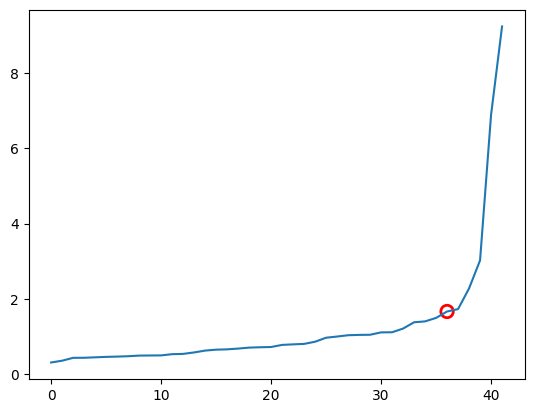

1.6677109140422763


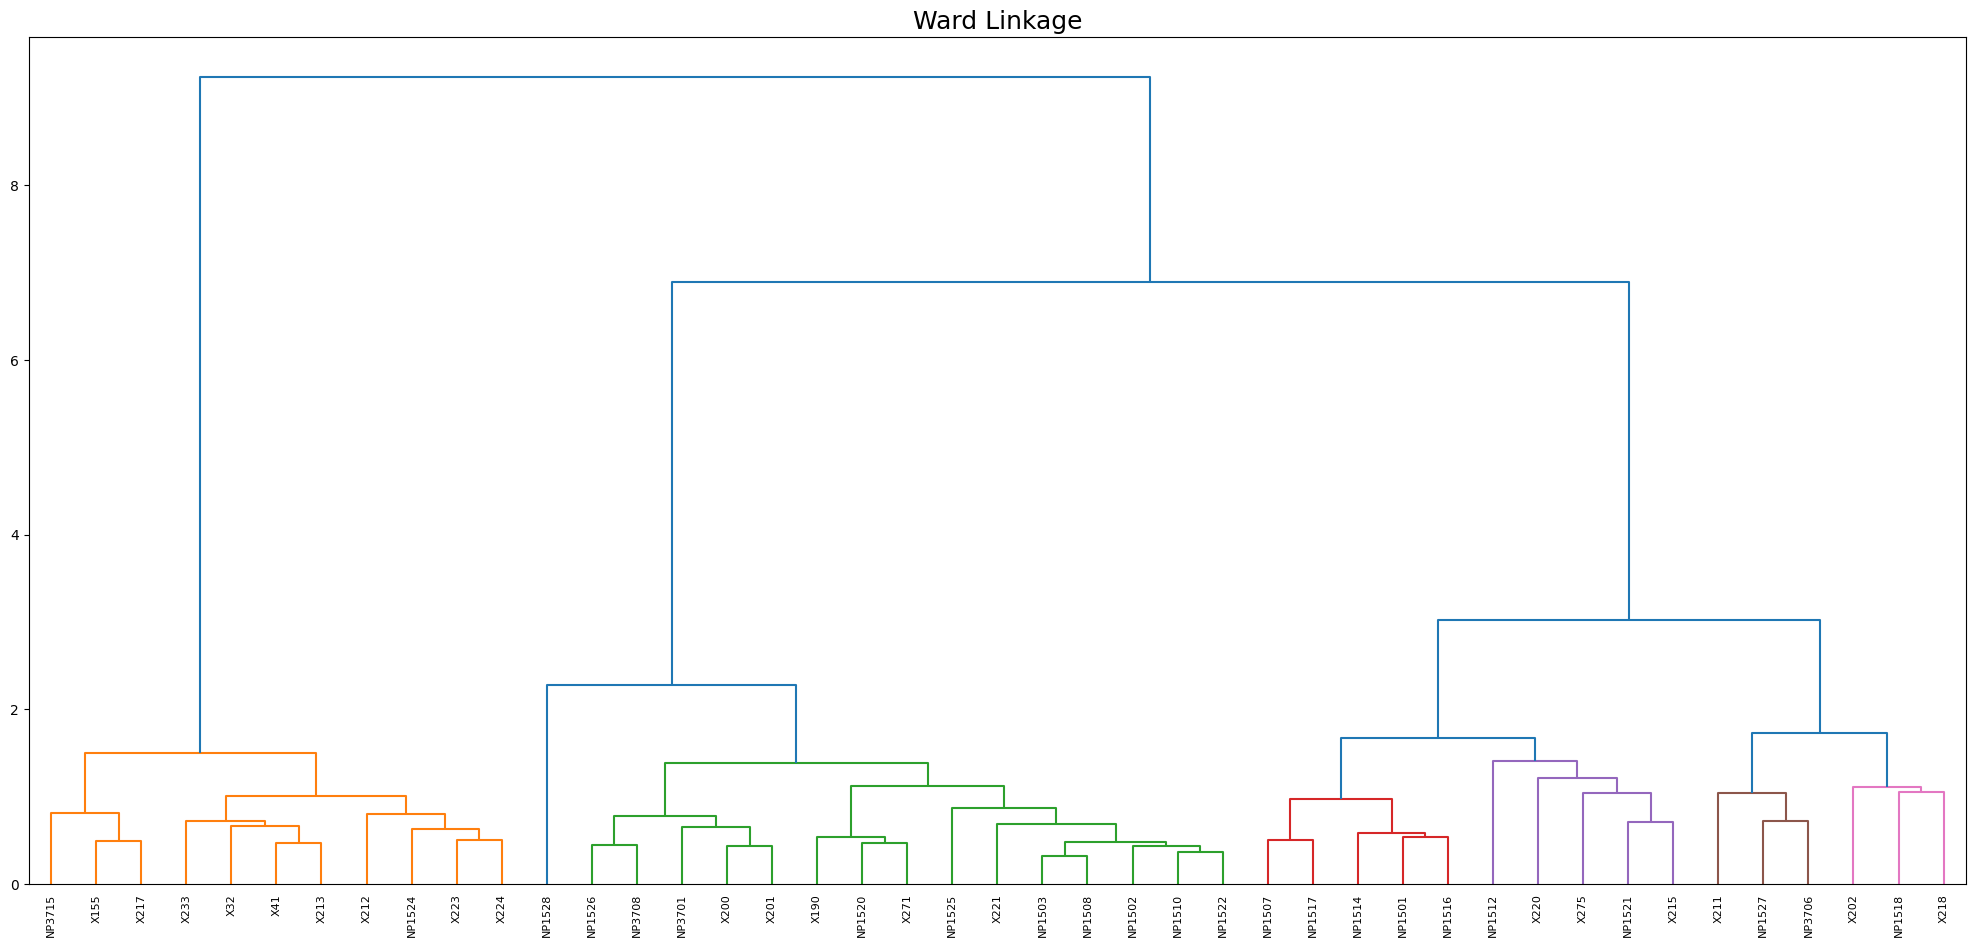

,cluster,NP1501*,NP1502*,NP1503*,NP1508*,NP1510*,NP1514*,NP1516*,NP1517*,NP1518*,...,X202*,X211*,X213*,X215*,X217*,X220*,X221*,X223*,X233*,X271*
Labelled,,,,,,,,,,,,,,,,,,,,,
X212,0,0.346189,0.245548,0.082553,0.136544,0.153293,0.186916,0.193780,0.214414,0.808540,...,0.843972,0.374051,0.955717,0.266968,0.929559,0.358491,0.200133,0.961329,0.918152,0.211048
X233,0,0.422406,0.157451,0.138173,0.192068,0.243114,0.334112,0.339713,0.252252,0.657025,...,0.736575,0.201899,0.707865,0.298643,0.864384,0.217655,0.167553,0.653050,0.910859,0.114731
X224,0,0.178145,0.119963,0.247073,0.311048,0.300000,0.207944,0.196172,0.205405,0.801653,...,0.835866,0.374051,0.953073,0.359729,0.895326,0.405660,0.351064,0.959695,0.917342,0.353399
X223,0,0.362718,0.259606,0.263466,0.284986,0.339521,0.303738,0.349282,0.235135,0.826446,...,0.887538,0.189873,0.964309,0.407240,0.926926,0.487197,0.390293,0.964052,0.939222,0.341360
X32,0,0.486685,0.042174,0.098946,0.175637,0.178443,0.210280,0.299043,0.281982,0.683196,...,0.816616,0.125316,0.845340,0.393665,0.926926,0.322776,0.286569,0.815359,0.937601,0.275496
X41,0,0.394858,0.016870,0.154567,0.203966,0.227545,0.320093,0.406699,0.373874,0.782369,...,0.851064,0.028481,0.868473,0.386878,0.916392,0.295822,0.200133,0.844227,0.928687,0.142351
X155,0,0.537190,0.328960,0.275176,0.374504,0.372455,0.530374,0.551435,0.493694,0.658402,...,0.861196,0.494937,0.816920,0.565611,0.922976,0.308625,0.355718,0.731481,0.932739,0.203966
X217,0,0.562902,0.313027,0.313817,0.322946,0.358084,0.502336,0.616029,0.451351,0.819559,...,0.829787,0.198101,0.912095,0.515837,0.926267,0.285714,0.257314,0.879085,0.919773,0.119688
NP1524,0,0.445363,0.111528,0.185597,0.250425,0.285030,0.306075,0.151914,0.249550,0.607438,...,0.840932,0.422785,0.923331,0.429864,0.930876,0.401617,0.459441,0.896514,0.940843,0.405099


In [12]:
hierarchical(data_index, "ward", 'polynomial', "Ward Linkage")

### Complete Linkage

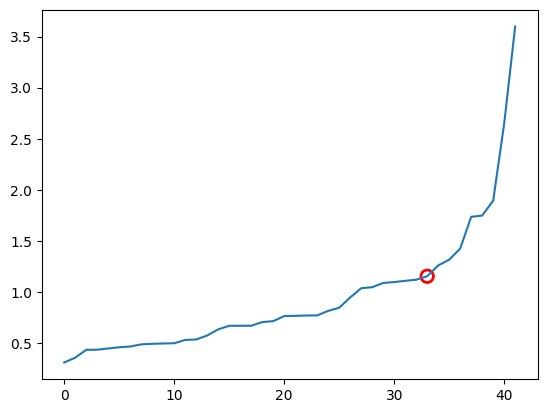

1.156633740943658


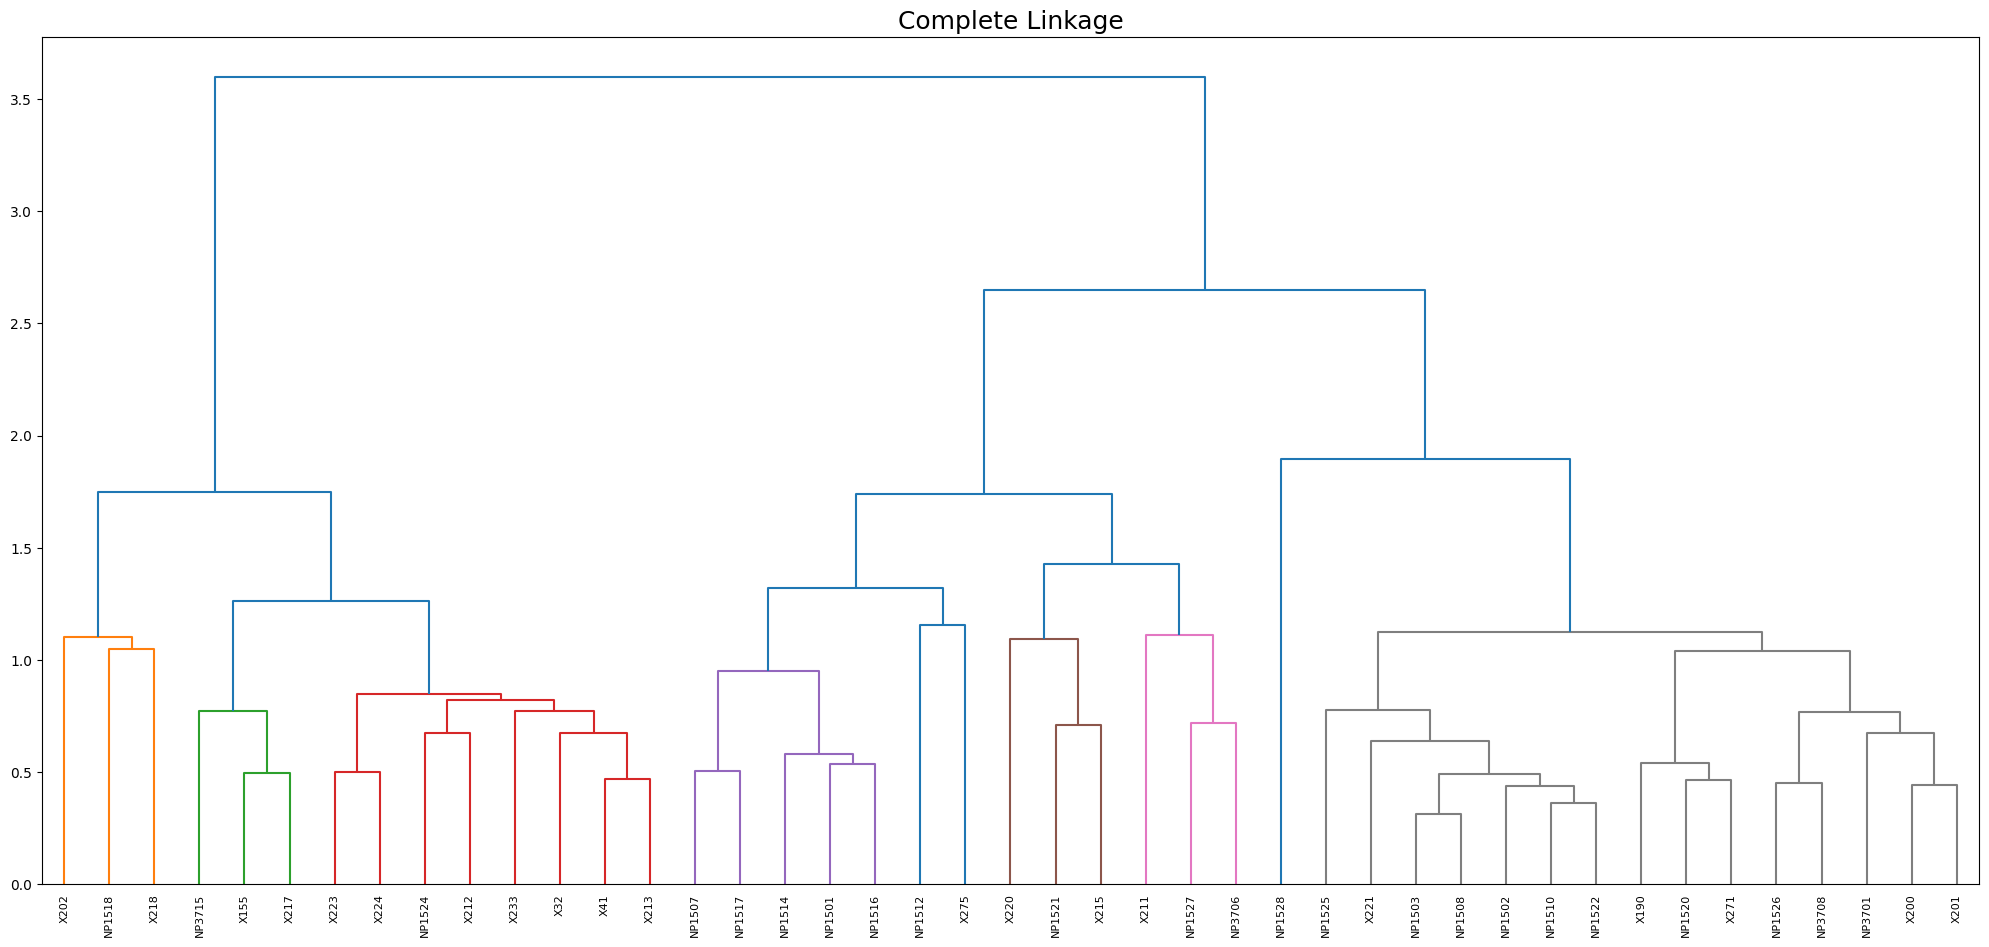

,cluster,NP1501*,NP1502*,NP1503*,NP1508*,NP1510*,NP1514*,NP1516*,NP1517*,NP1518*,...,X202*,X211*,X213*,X215*,X217*,X220*,X221*,X223*,X233*,X271*
Labelled,,,,,,,,,,,,,,,,,,,,,
NP3708,0,0.379247,0.645736,0.852459,0.905382,0.847904,0.827103,0.665072,0.842342,0.176309,...,0.532928,0.233544,0.139458,0.416290,0.342989,0.158356,0.855718,0.049564,0.269044,0.861898
NP1502,0,0.179982,0.601687,0.754098,0.861190,0.791018,0.661215,0.431818,0.594595,0.139118,...,0.451874,0.150000,0.063450,0.502262,0.225148,0.189353,0.779920,0.034314,0.344408,0.711756
NP1503,0,0.294766,0.710403,0.950234,0.963173,0.943114,0.714953,0.391148,0.632432,0.148760,...,0.457953,0.158228,0.076008,0.450226,0.210665,0.181267,0.923537,0.001089,0.246353,0.922805
X221,0,0.406795,0.678538,0.848361,0.888385,0.853293,0.476636,0.417464,0.456757,0.170799,...,0.572442,0.261392,0.148050,0.459276,0.253456,0.221698,0.804521,0.090414,0.226904,0.807365
NP1508,0,0.327824,0.636364,0.893443,0.939943,0.886228,0.677570,0.277512,0.629730,0.023416,...,0.451874,0.122785,0.067416,0.495475,0.262014,0.224394,0.847074,0.063181,0.147488,0.834986
NP1510,0,0.282828,0.641987,0.842506,0.925212,0.860479,0.537383,0.331340,0.525225,0.139118,...,0.430598,0.187975,0.123596,0.479638,0.304147,0.247305,0.827793,0.033224,0.236629,0.844193
X271,0,0.552801,0.645736,0.940867,0.960907,0.937725,0.497664,0.602871,0.515315,0.184573,...,0.683891,0.089873,0.248513,0.475113,0.371955,0.208895,0.894947,0.038671,0.339546,0.921388
NP1526,0,0.548209,0.564199,0.740632,0.820963,0.775449,0.794393,0.651914,0.810811,0.141873,...,0.529889,0.162658,0.105750,0.411765,0.213298,0.146226,0.744681,0.053922,0.324959,0.713881
NP1525,0,0.078972,0.635426,0.906909,0.938244,0.911377,0.285047,0.187799,0.396396,0.162534,...,0.480243,0.091772,0.179114,0.309955,0.364055,0.115229,0.867021,0.172658,0.510535,0.922096


In [13]:
hierarchical(data_index, "complete", 'interp1d', "Complete Linkage")

### Average Linkage

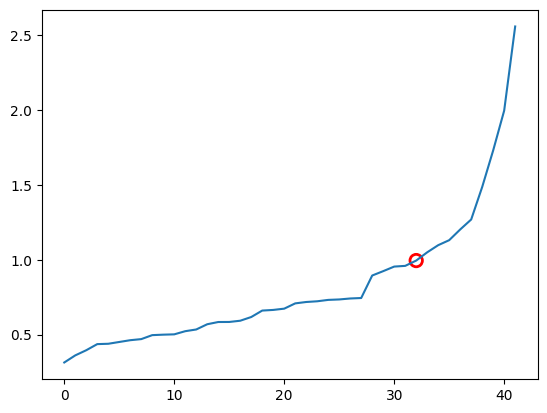

0.9948010251156342


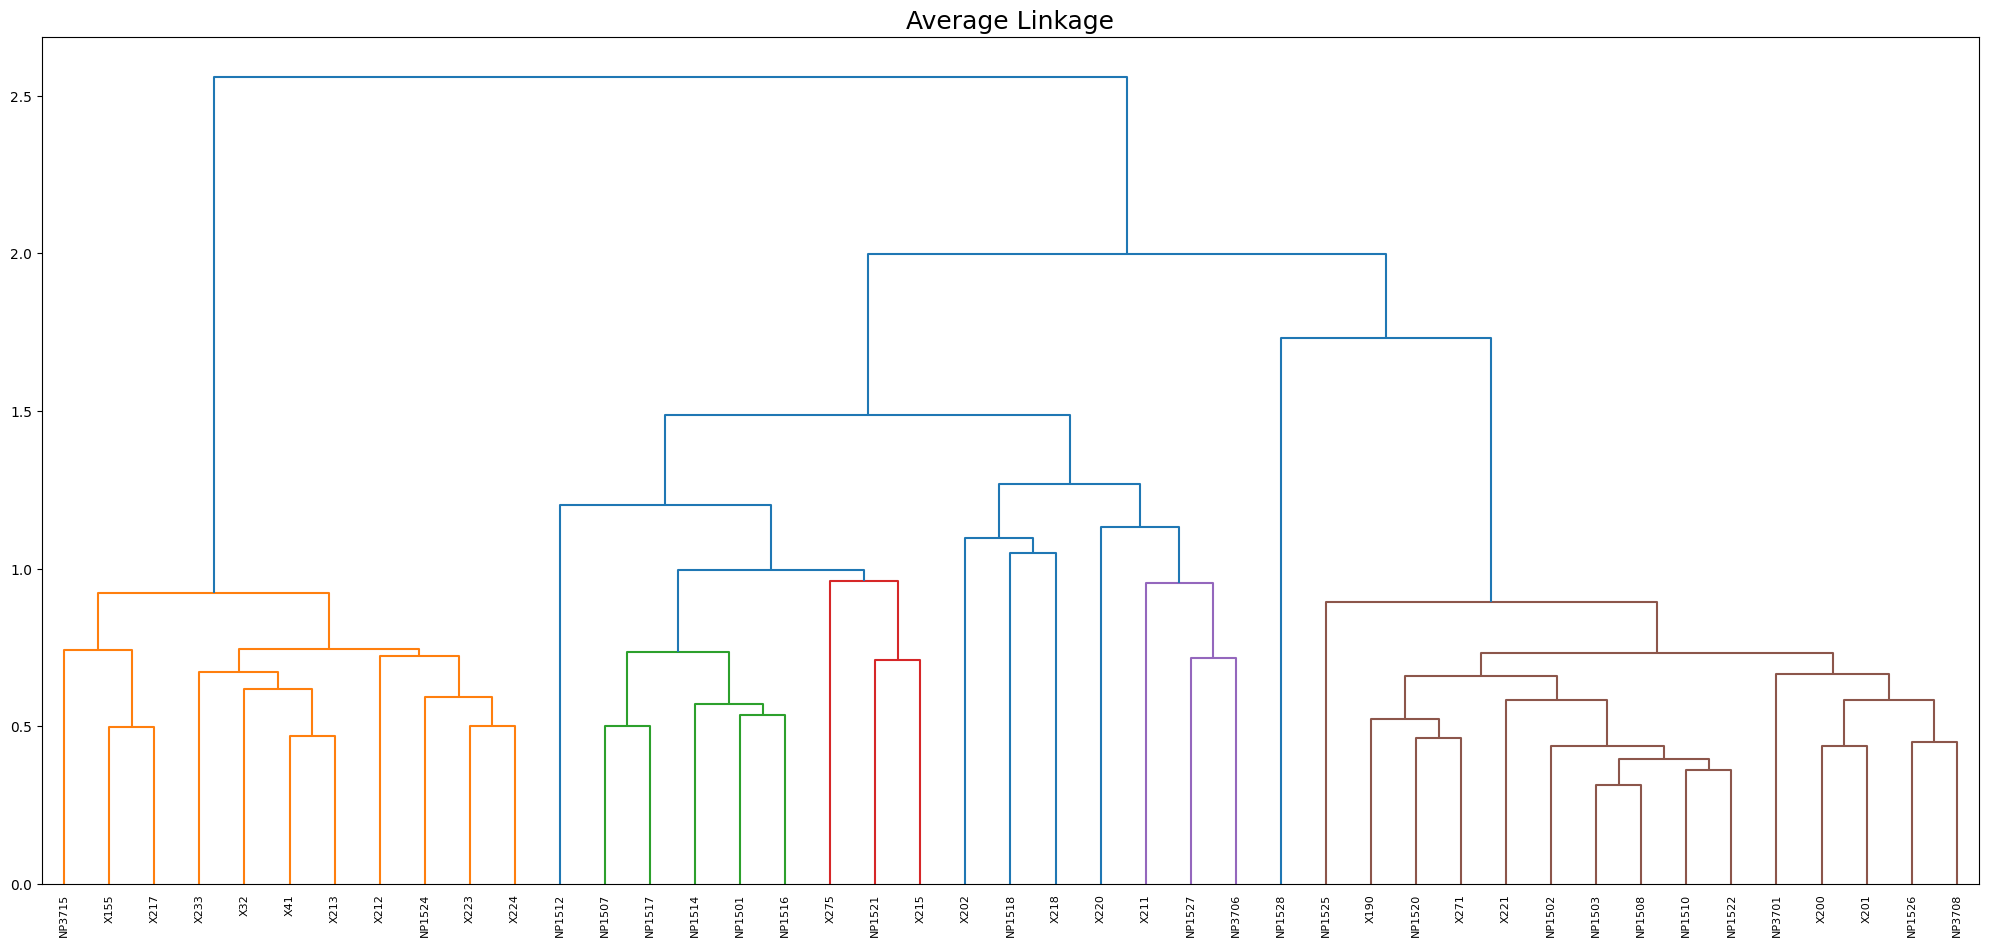

,cluster,NP1501*,NP1502*,NP1503*,NP1508*,NP1510*,NP1514*,NP1516*,NP1517*,NP1518*,...,X202*,X211*,X213*,X215*,X217*,X220*,X221*,X223*,X233*,X271*
Labelled,,,,,,,,,,,,,,,,,,,,,
X275,0,0.598714,0.461106,0.454333,0.508782,0.491018,0.478972,0.672249,0.362162,0.064738,...,0.612969,0.272152,0.194316,0.391403,0.271231,0.104447,0.480718,0.003813,0.097245,0.441926
NP1521,0,0.505969,0.410497,0.322014,0.361473,0.367066,0.586449,0.458134,0.482883,0.037190,...,0.540020,0.155696,0.106411,0.658371,0.289006,0.185310,0.371011,0.008715,0.218801,0.149433
X215,0,0.435262,0.227741,0.157494,0.167705,0.195210,0.434579,0.578947,0.400901,0.199725,...,0.599797,0.155696,0.163252,0.665158,0.268598,0.210243,0.243351,0.005991,0.122366,0.060198
NP3715,1,0.444444,0.483599,0.466042,0.567139,0.492216,0.616822,0.343301,0.500901,0.753444,...,0.848024,0.315823,0.909451,0.323529,0.937459,0.406334,0.371676,0.900327,0.941653,0.365439
NP1524,1,0.445363,0.111528,0.185597,0.250425,0.285030,0.306075,0.151914,0.249550,0.607438,...,0.840932,0.422785,0.923331,0.429864,0.930876,0.401617,0.459441,0.896514,0.940843,0.405099
X32,1,0.486685,0.042174,0.098946,0.175637,0.178443,0.210280,0.299043,0.281982,0.683196,...,0.816616,0.125316,0.845340,0.393665,0.926926,0.322776,0.286569,0.815359,0.937601,0.275496
X41,1,0.394858,0.016870,0.154567,0.203966,0.227545,0.320093,0.406699,0.373874,0.782369,...,0.851064,0.028481,0.868473,0.386878,0.916392,0.295822,0.200133,0.844227,0.928687,0.142351
X155,1,0.537190,0.328960,0.275176,0.374504,0.372455,0.530374,0.551435,0.493694,0.658402,...,0.861196,0.494937,0.816920,0.565611,0.922976,0.308625,0.355718,0.731481,0.932739,0.203966
X212,1,0.346189,0.245548,0.082553,0.136544,0.153293,0.186916,0.193780,0.214414,0.808540,...,0.843972,0.374051,0.955717,0.266968,0.929559,0.358491,0.200133,0.961329,0.918152,0.211048


In [14]:
hierarchical(data_index, "average", 'interp1d', "Average Linkage")

### Single Linkage

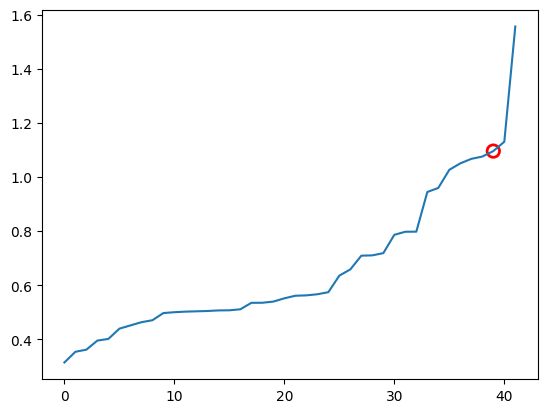

1.0952186261931172


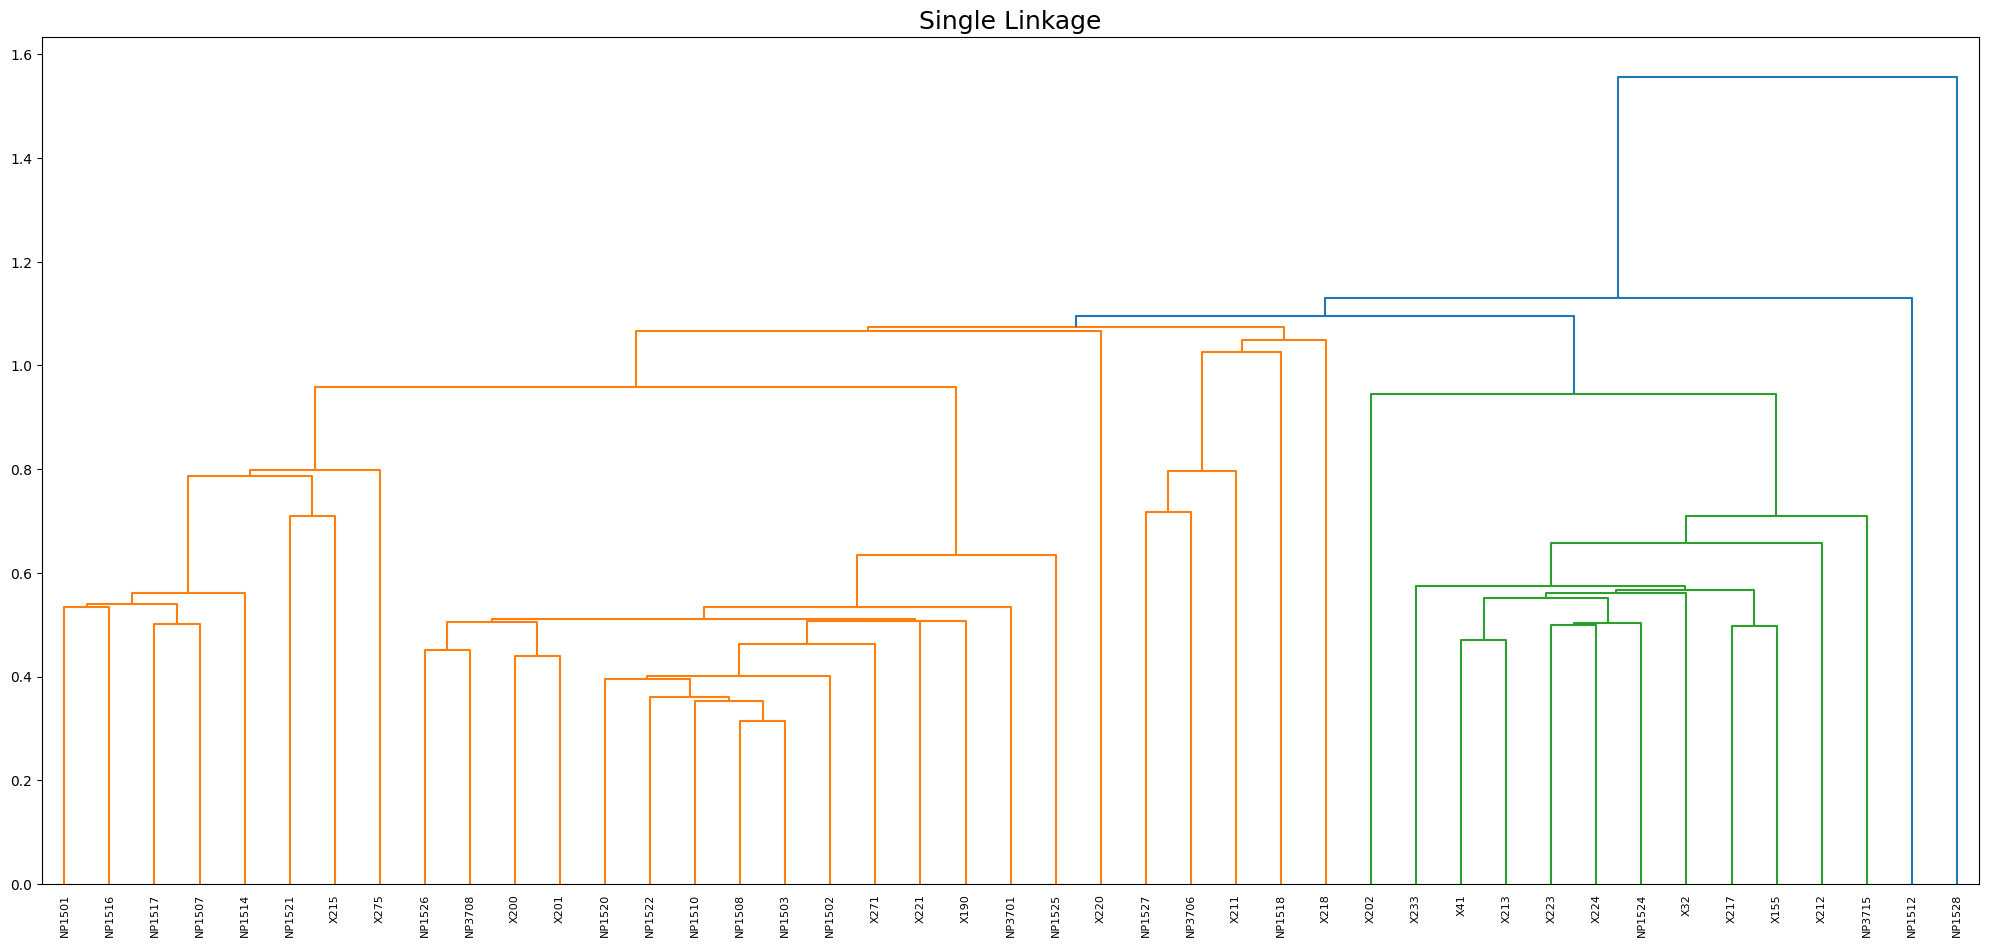

,cluster,NP1501*,NP1502*,NP1503*,NP1508*,NP1510*,NP1514*,NP1516*,NP1517*,NP1518*,...,X202*,X211*,X213*,X215*,X217*,X220*,X221*,X223*,X233*,X271*
Labelled,,,,,,,,,,,,,,,,,,,,,
NP1501,0,0.587695,0.329897,0.219555,0.274221,0.319760,0.757009,0.643541,0.758559,0.267218,...,0.551165,0.137342,0.080635,0.420814,0.252140,0.198787,0.345745,0.004902,0.376823,0.130312
X221,0,0.406795,0.678538,0.848361,0.888385,0.853293,0.476636,0.417464,0.456757,0.170799,...,0.572442,0.261392,0.148050,0.459276,0.253456,0.221698,0.804521,0.090414,0.226904,0.807365
X220,0,0.533517,0.347704,0.286885,0.295184,0.322754,0.591121,0.586124,0.468468,0.150138,...,0.703141,0.252532,0.282882,0.490950,0.462804,0.902291,0.225399,0.149237,0.375203,0.019122
X218,0,0.610652,0.316776,0.187939,0.193768,0.264671,0.488318,0.576555,0.411712,0.461433,...,0.721378,0.022152,0.366160,0.576923,0.589862,0.163747,0.178856,0.132353,0.620746,0.031870
X215,0,0.435262,0.227741,0.157494,0.167705,0.195210,0.434579,0.578947,0.400901,0.199725,...,0.599797,0.155696,0.163252,0.665158,0.268598,0.210243,0.243351,0.005991,0.122366,0.060198
X211,0,0.412305,0.193065,0.116511,0.194334,0.182635,0.285047,0.279904,0.246847,0.381543,...,0.722391,0.867722,0.310641,0.312217,0.368005,0.316712,0.295878,0.243464,0.312804,0.262748
X201,0,0.593205,0.605436,0.778689,0.830028,0.798802,0.637850,0.589713,0.616216,0.081267,...,0.627153,0.289241,0.182419,0.572398,0.276498,0.206199,0.730718,0.045207,0.252836,0.637394
X200,0,0.532599,0.627929,0.774590,0.844759,0.814371,0.635514,0.618421,0.606306,0.001377,...,0.601824,0.218987,0.203569,0.570136,0.227781,0.169811,0.787234,0.024510,0.166126,0.689093
X190,0,0.594123,0.638238,0.957845,0.968272,0.959281,0.693925,0.619617,0.784685,0.221763,...,0.633232,0.108228,0.266358,0.515837,0.337722,0.200809,0.939495,0.101852,0.274716,0.941218


In [17]:
hierarchical(data_index, "single", 'interp1d', "Single Linkage")